In [70]:
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mpl_finance as mpf

In [66]:
start = dt.datetime(2022,1,1)
end = dt.datetime(2023,8,1)

yf.pdr_override()
stock = input('Enter a stock ticker symbol : ')

data = pdr.get_data_yahoo(stock, start, end)
data.reset_index(inplace=True)
data

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000
1,2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000
2,2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000
3,2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000
4,2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000
...,...,...,...,...,...,...,...
390,2023-07-25,129.309998,129.580002,128.529999,129.130005,129.130005,39236700
391,2023-07-26,126.510002,129.080002,126.110001,128.149994,128.149994,53910100
392,2023-07-27,131.000000,132.630005,127.790001,128.250000,128.250000,52610700
393,2023-07-28,129.690002,133.009995,129.330002,132.210007,132.210007,46317400


In [67]:
data = data[['Date','Open', 'High', 'Low', 'Close']]

data['Date'] = data['Date'].map(mdates.date2num)

C:\Users\nbwan\AppData\Local\Temp\ipykernel_20876\3911683814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].map(mdates.date2num)


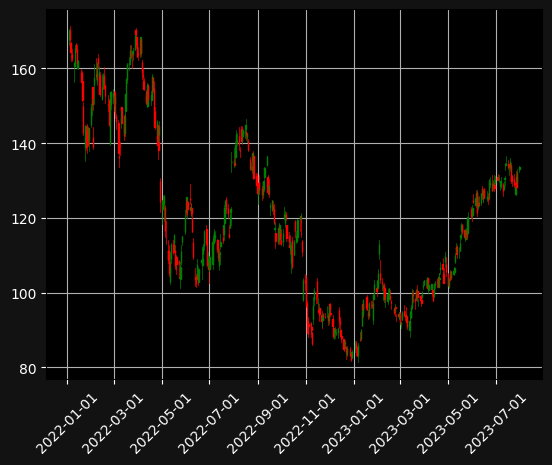

In [73]:
ax = plt.subplot()
ax.grid(True)
ax.set_axisbelow(True)
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis= 'x', colors = 'white')
ax.tick_params(axis= 'y', colors = 'white')
ax.xaxis_date()


ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
mpf.candlestick_ohlc(ax, data.values, width=0.5, colorup='g', colordown='r')

plt.show()